In [15]:
from matplotlib import pyplot as plt
import timeit
from functools import partial
import os
import Regex
from Formateur import formater_dtd, formater_xml, verifier_bien_forme

In [2]:
os.system("javac Program.java")

0

In [4]:
def tester_validite(N, gname='test.dtd'):
    os.system("java Program " + str(N))
    fname = 'test'+str(N)+'.xml'
    xml = formater_xml(fname)
    dtd = formater_dtd(gname)
    valide = False
    for key in xml:
        #print(dtd[key])
        nfa = Regex.compile(dtd[key])
        for chaine in xml[key]:
            #print(key, chaine)
            if nfa.match(chaine):
                valide = True
    return valide

In [5]:
def tester_bien_forme(N):
    os.system("java Program " + str(N))
    fname = 'test'+str(N)+'.xml'
    xml = formater_xml(fname)

In [43]:
def plotTC(fn, liste, nTests, label):
    x = []
    y = []
    for i in liste:
        N = i
        testNTimer = timeit.Timer(partial(fn, N))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    p1 = plt.plot(x, y, linestyle='-', label=label)
    return p1

In [53]:
def main():
    plt.close("all")
    plt.ion()
    plt.figure(1, figsize=(15, 10))
    courbe_validite, = plotTC(tester_validite, liste, 10, "Validity")
    courbe_bien_forme, = plotTC(tester_bien_forme, liste, 10, "Well-formedness")
    courbe = [courbe_validite, courbe_bien_forme]
    label = ['Validity', 'Well-formedness']
    #plt.legend(courbe,label)
    #l1 = plt.legend([courbe_validite], ["1"], loc=1)
    l2 = plt.legend(courbe, label, loc=1)
    plt.title('Alogirthms benchmarking')
    plt.xlabel("Number of tags")
    plt.ylabel("Execution time (s)")
    plt.show()

In [57]:
#liste = [100, 120, 150]
liste = [100, 1000, 10000, 50000, 100000, 250000, 500000]
#, 1000000, 2000000]
#liste = [100, 1000, 10000, 50000]

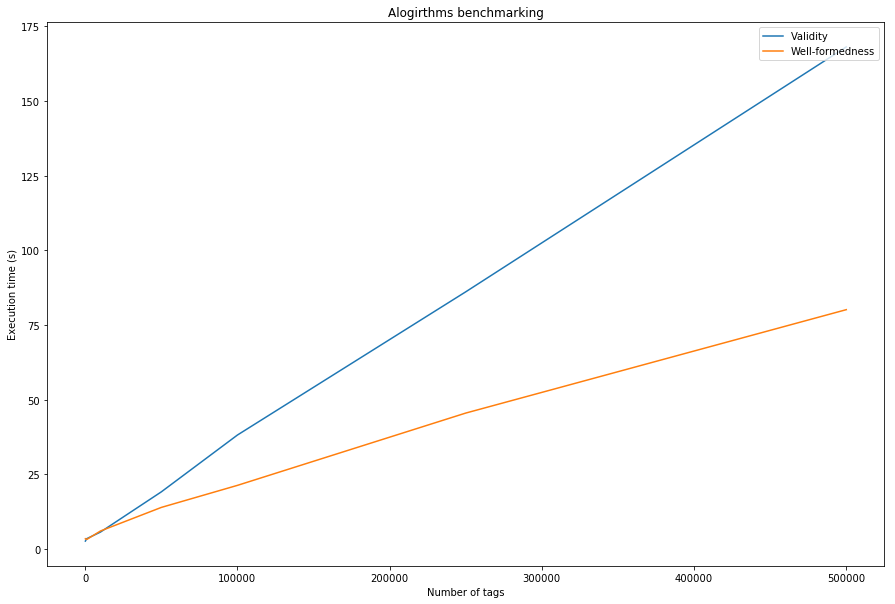

In [58]:
if __name__ == '__main__':
    main()